In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/raw data.csv")
# Remove last 210,000 rows if applicable
df = df.iloc[:-210000]
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
109790           No  46.99      No              No     No             5.0   
109791           No  30.23     Yes             Yes     No             0.0   
109792           No  19.49      No              No     No             0.0   
109793          Yes  23.30     Yes              No     No             0.0   
109794           No  31.09     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
109790           0.0         Yes  Female        50-54     Other       No   
109791           2.0          No  Female        70-74     White       No   
109792           0.0          No  Female        65-69     White       No   
109793           0.0          No    Male        60-64  Hispanic       No   
109794           5.0          No  Female        65-69     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
109790              Yes       Fair        7.0     No            No        Yes  
109791              Yes       Good        6.0     No            No         No  
109792              Yes  Excellent        8.0     No            No         No  
109793              Yes  Very good        8.0     No            No         No  
109794              Yes       Good        7.0    Yes            No        Yes  

[109795 rows x 18 columns]

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109795 entries, 0 to 109794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      109795 non-null  object 
 1   BMI               109795 non-null  float64
 2   Smoking           109795 non-null  object 
 3   AlcoholDrinking   109795 non-null  object 
 4   Stroke            109795 non-null  object 
 5   PhysicalHealth    109795 non-null  float64
 6   MentalHealth      109795 non-null  float64
 7   DiffWalking       109795 non-null  object 
 8   Sex               109795 non-null  object 
 9   AgeCategory       109795 non-null  object 
 10  Race              109795 non-null  object 
 11  Diabetic          109795 non-null  object 
 12  PhysicalActivity  109795 non-null  object 
 13  GenHealth         109795 non-null  object 
 14  SleepTime         109795 non-null  float64
 15  Asthma            109795 non-null  object 
 16  KidneyDisease     10

In [3]:
df.describe()


BMI  PhysicalHealth   MentalHealth      SleepTime
count  109795.000000   109795.000000  109795.000000  109795.000000
mean       28.255058        3.487736       3.928585       7.101097
std         6.401568        8.074576       7.989386       1.479221
min        12.020000        0.000000       0.000000       1.000000
25%        23.810000        0.000000       0.000000       6.000000
50%        27.260000        0.000000       0.000000       7.000000
75%        31.380000        2.000000       3.000000       8.000000
max        93.970000       30.000000      30.000000      24.000000

In [4]:
# Handling missing values
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif pd.api.types.is_object_dtype(df[column]):
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

print("Missing values count per column after filling:")
print(df.isnull().sum())

<ipython-input-4-4ea49bf1d10b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
<ipython-input-4-4ea49bf1d10b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Missing values count per column after filling:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [5]:
# Remove duplicates
df = df.drop_duplicates()
print("Shape of the DataFrame after dropping duplicates:")
print(df.shape)


Shape of the DataFrame after dropping duplicates:
(107340, 18)


In [6]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
109789           No  20.03     Yes              No     No             0.0   
109790           No  46.99      No              No     No             5.0   
109791           No  30.23     Yes             Yes     No             0.0   
109793          Yes  23.30     Yes              No     No             0.0   
109794           No  31.09     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
109789           0.0          No  Female        70-74     White       No   
109790           0.0         Yes  Female        50-54     Other       No   
109791           2.0          No  Female        70-74     White       No   
109793           0.0          No    Male        60-64  Hispanic       No   
109794           5.0          No  Female        65-69     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
109789              Yes  Very good        7.0     No            No         No  
109790              Yes       Fair        7.0     No            No        Yes  
109791              Yes       Good        6.0     No            No         No  
109793              Yes  Very good        8.0     No            No         No  
109794              Yes       Good        7.0    Yes            No        Yes  

[107340 rows x 18 columns]

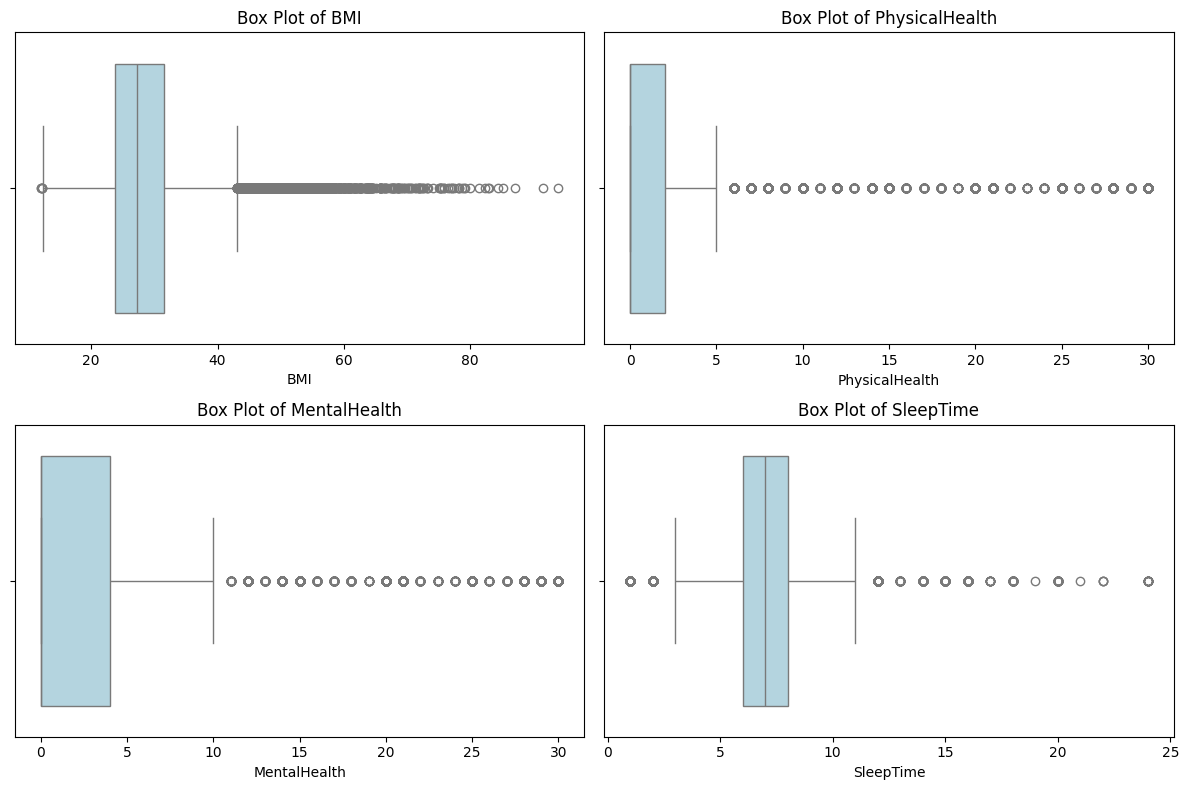

In [7]:
# univariate
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns for which to detect outliers
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col ,color='lightblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [8]:
# Outliers handling (cap outliers to 3 standard deviations)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z_scores = stats.zscore(df[column])
        abs_z_scores = np.abs(z_scores)
        outliers = (abs_z_scores > 3)
        df.loc[outliers, column] = np.sign(z_scores[outliers]) * 3 * df[column].std() + df[column].mean()

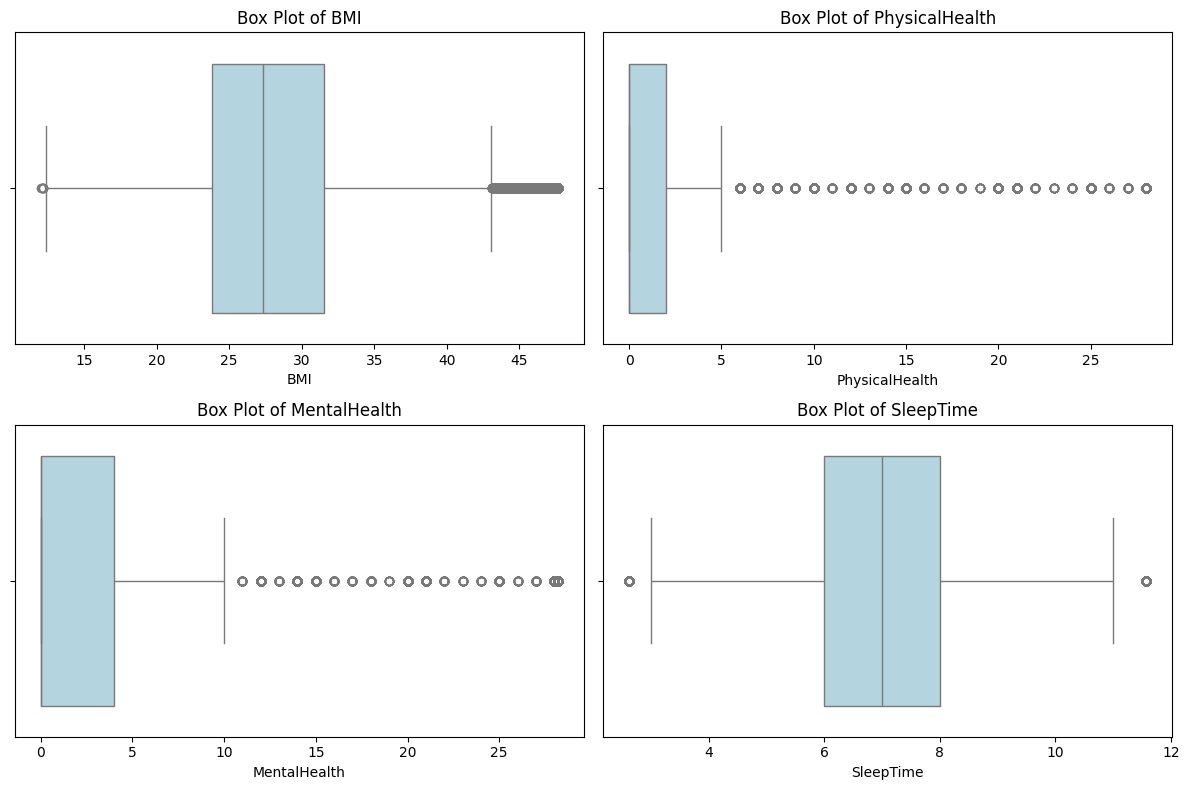

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns for which to detect outliers
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col ,color='lightblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [10]:
df


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
109789           No  20.03     Yes              No     No             0.0   
109790           No  46.99      No              No     No             5.0   
109791           No  30.23     Yes             Yes     No             0.0   
109793          Yes  23.30     Yes              No     No             0.0   
109794           No  31.09     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0          28.186226          No  Female        55-59     White      Yes   
1           0.000000          No  Female  80 or older     White       No   
2          28.186226          No    Male        65-69     White      Yes   
3           0.000000          No  Female        75-79     White       No   
4           0.000000         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
109789      0.000000          No  Female        70-74     White       No   
109790      0.000000         Yes  Female        50-54     Other       No   
109791      2.000000          No  Female        70-74     White       No   
109793      0.000000          No    Male        60-64  Hispanic       No   
109794      5.000000          No  Female        65-69     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
109789              Yes  Very good        7.0     No            No         No  
109790              Yes       Fair        7.0     No            No        Yes  
109791              Yes       Good        6.0     No            No         No  
109793              Yes  Very good        8.0     No            No         No  
109794              Yes       Good        7.0    Yes            No        Yes  

[107340 rows x 18 columns]

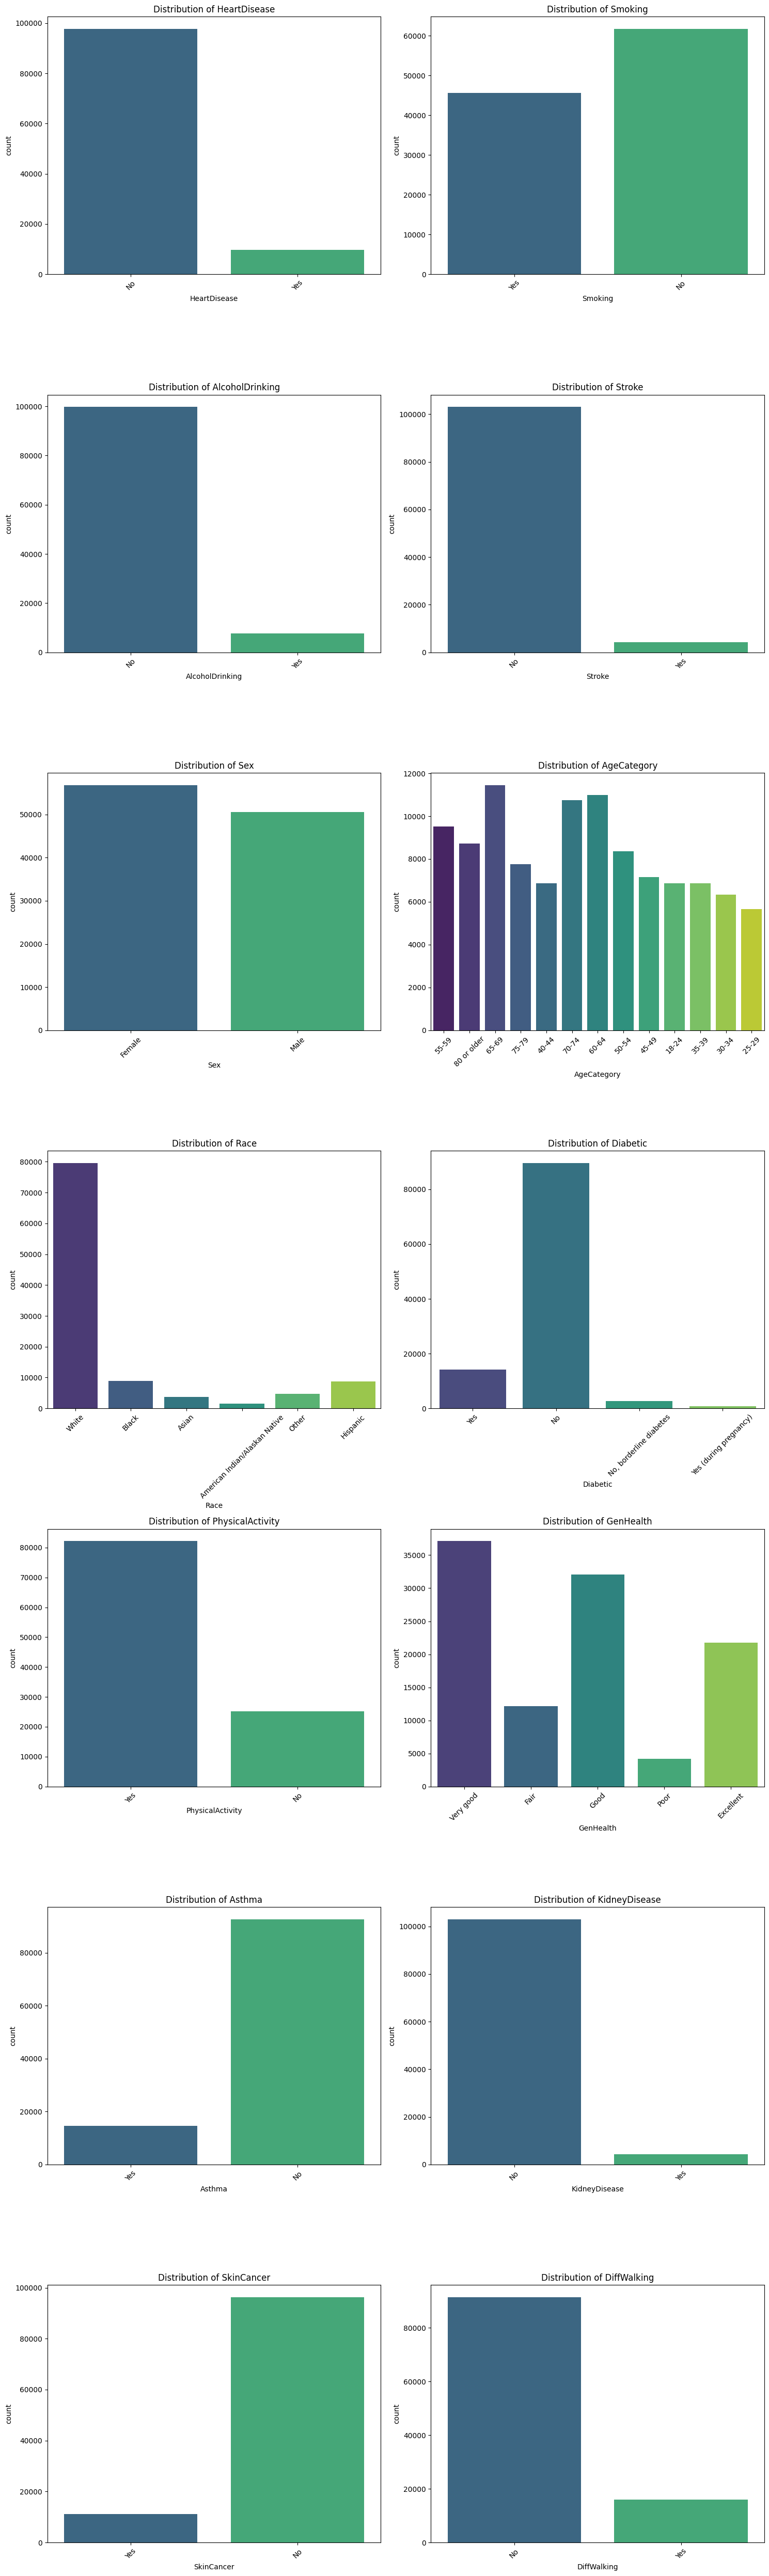

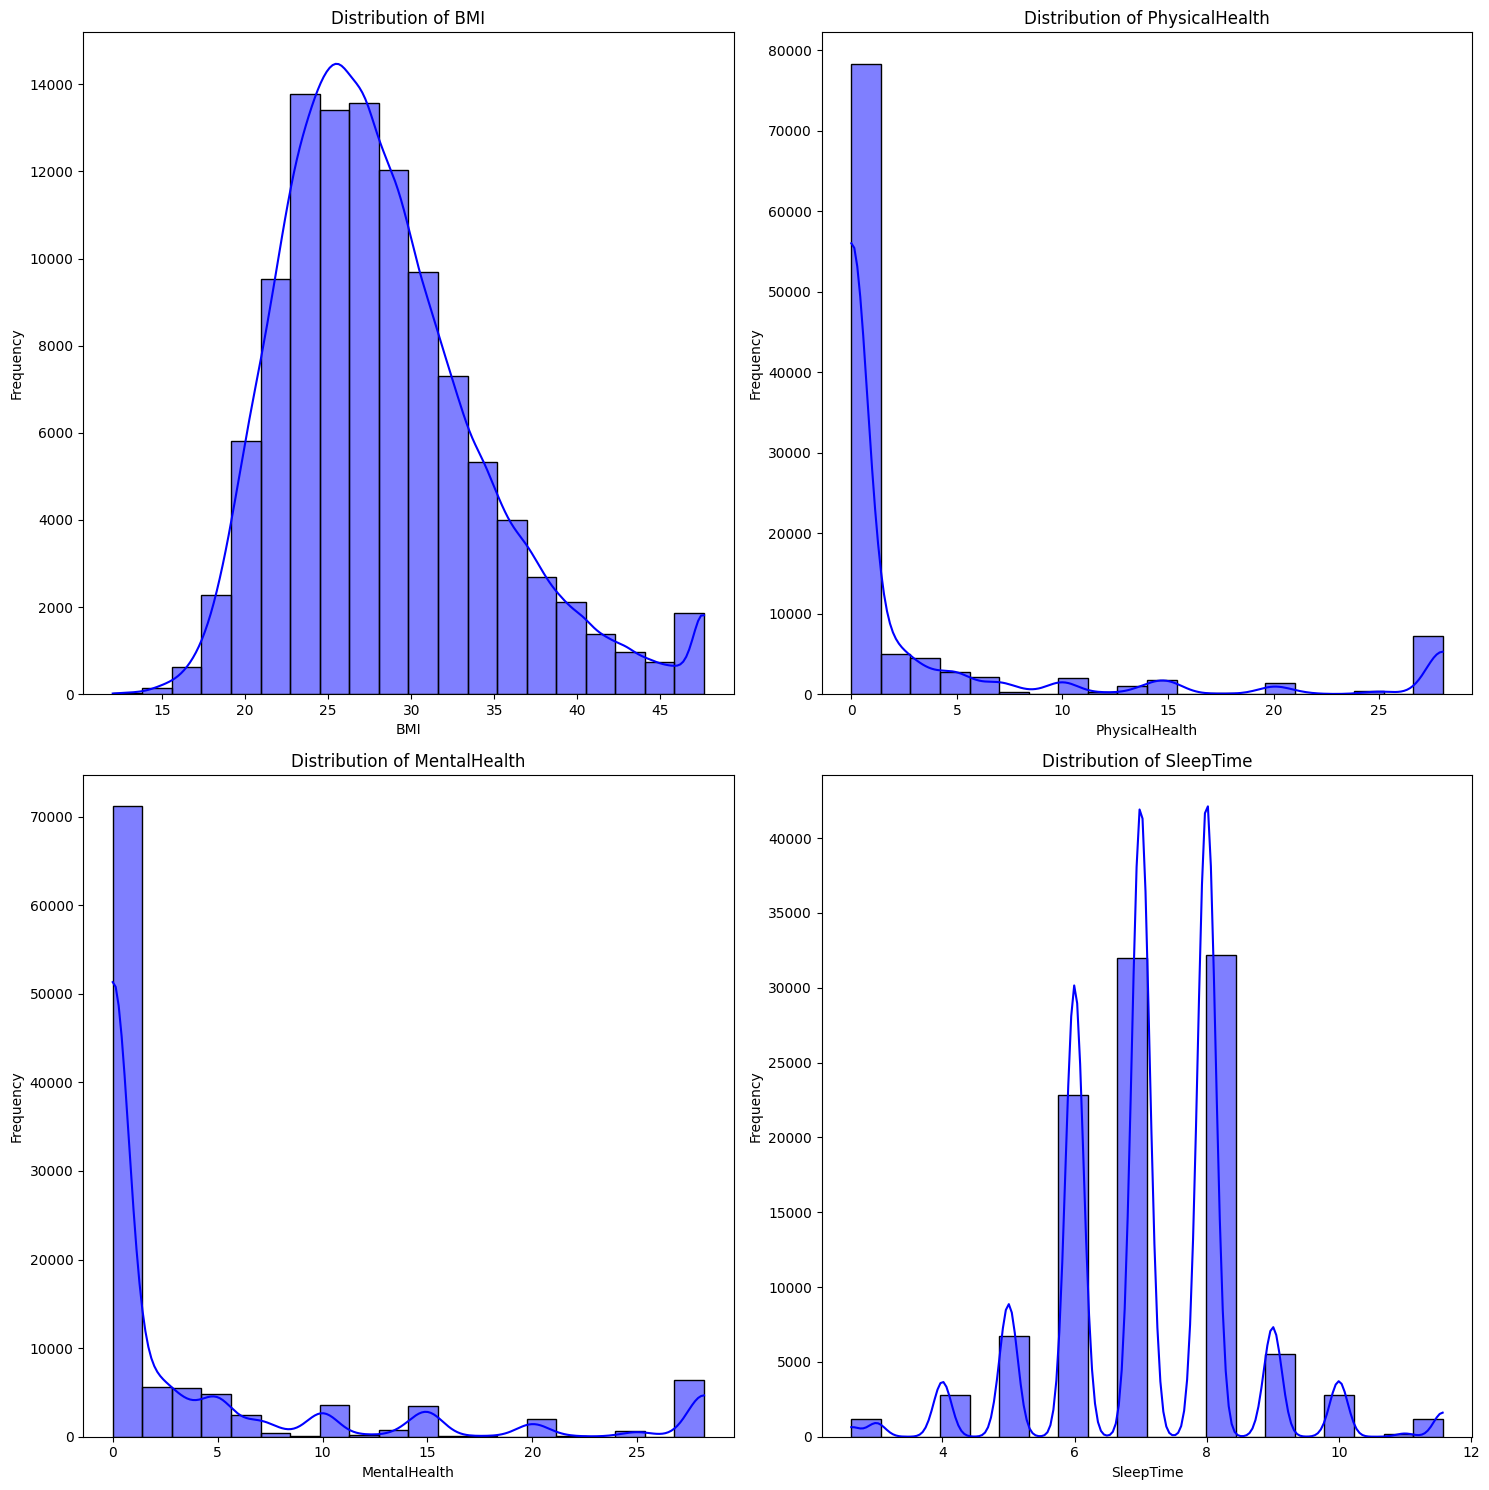

In [11]:
# Univariate
import warnings
warnings.filterwarnings("ignore")

categorical_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                    'Sex', 'AgeCategory', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'Asthma',
                    'KidneyDisease', 'SkinCancer', 'DiffWalking']

numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 50))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(7, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

# Univariate Analysis for Numerical Variables
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)  # Adjust the layout based on the number of numerical columns
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

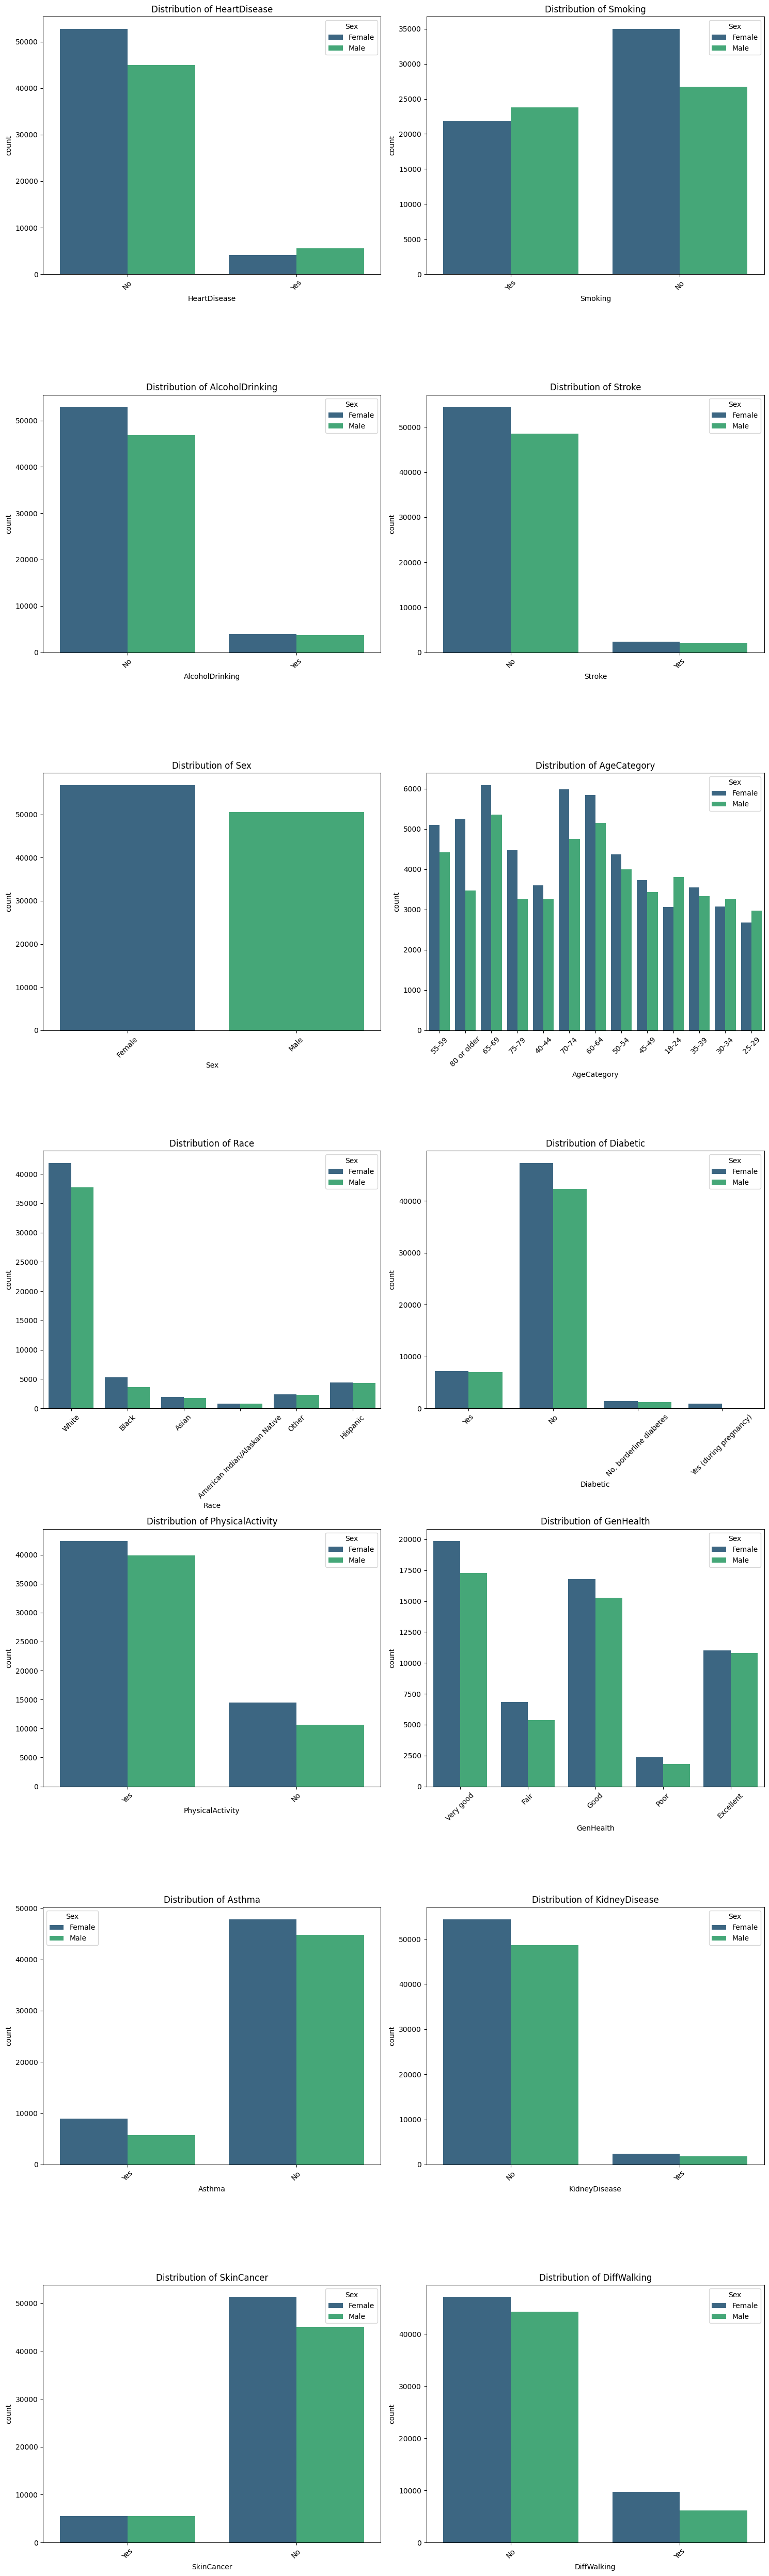

In [12]:
categorical_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                    'Sex', 'AgeCategory', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'Asthma',
                    'KidneyDisease', 'SkinCancer', 'DiffWalking']

numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 50))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(7, 2, i)
    sns.countplot(data=df, x=col, hue='Sex',palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

In [13]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
109789           No  20.03     Yes              No     No             0.0   
109790           No  46.99      No              No     No             5.0   
109791           No  30.23     Yes             Yes     No             0.0   
109793          Yes  23.30     Yes              No     No             0.0   
109794           No  31.09     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0          28.186226          No  Female        55-59     White      Yes   
1           0.000000          No  Female  80 or older     White       No   
2          28.186226          No    Male        65-69     White      Yes   
3           0.000000          No  Female        75-79     White       No   
4           0.000000         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
109789      0.000000          No  Female        70-74     White       No   
109790      0.000000         Yes  Female        50-54     Other       No   
109791      2.000000          No  Female        70-74     White       No   
109793      0.000000          No    Male        60-64  Hispanic       No   
109794      5.000000          No  Female        65-69     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
109789              Yes  Very good        7.0     No            No         No  
109790              Yes       Fair        7.0     No            No        Yes  
109791              Yes       Good        6.0     No            No         No  
109793              Yes  Very good        8.0     No            No         No  
109794              Yes       Good        7.0    Yes            No        Yes  

[107340 rows x 18 columns]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'AgeCategory', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'DiffWalking']
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 400))

# Iterate over each combination of categorical and numerical columns
for j, cat_col in enumerate(categorical_cols):
    for i, num_col in enumerate(numerical_cols):
        plt.subplot(len(categorical_cols) * len(numerical_cols), 1, j * len(numerical_cols) + i + 1)
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='coolwarm', hue='HeartDisease', dodge=True)
        plt.title(f'{num_col} by {cat_col} and Heart Disease')
        plt.xticks(rotation=45)
        plt.legend(title='HeartDisease')  # Set legend title to 'HeartDisease' for clarity

plt.tight_layout()
plt.show()


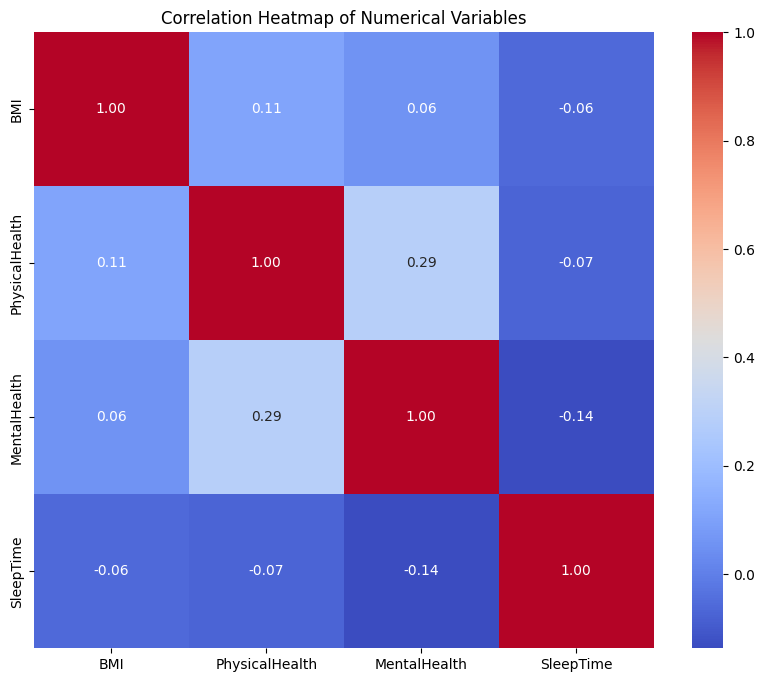

In [15]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [16]:
# Transform categorical data
for column in df.columns:
    if column == 'GenHealth':
        df[column] = df[column].replace({
            'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 4, 'Excellent': 5
        })
    elif column == 'AgeCategory':
        df[column] = df[column].replace({
            '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
            '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
            '70-74': 10, '75-79': 11, '80 or older': 12
        })
    elif pd.api.types.is_object_dtype(df[column]) and column not in ['AgeCategory', 'GenHealth']:
        # Replace with appropriate mappings for each categorical column
        df[column] = df[column].replace({
            'White': 1, 'Black': 2, 'Asian': 3, 'American Indian/Alaskan Native': 4,
            'Other': 5, 'Hispanic': 6, 'No': 0, 'Yes': 1, 'No, borderline diabetes': 2,
            'Yes (during pregnancy)': 3, 'Male': 1, 'Female': 0
        })


In [17]:
print("Data after processing categorical columns:")
df

Data after processing categorical columns:


HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
109789             0  20.03        1                0       0             0.0   
109790             0  46.99        0                0       0             5.0   
109791             0  30.23        1                1       0             0.0   
109793             1  23.30        1                0       0             0.0   
109794             0  31.09        1                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          28.186226            0    0            7     1         1   
1           0.000000            0    0           12     1         0   
2          28.186226            0    1            9     1         1   
3           0.000000            0    0           11     1         0   
4           0.000000            1    0            4     1         0   
...              ...          ...  ...          ...   ...       ...   
109789      0.000000            0    0           10     1         0   
109790      0.000000            1    0            6     5         0   
109791      2.000000            0    0           10     1         0   
109793      0.000000            0    1            8     6         0   
109794      5.000000            0    0            9     1         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          4        5.0       1              0   
1                      1          4        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          4        8.0       0              0   
...                  ...        ...        ...     ...            ...   
109789                 1          4        7.0       0              0   
109790                 1          1        7.0       0              0   
109791                 1          2        6.0       0              0   
109793                 1          4        8.0       0              0   
109794                 1          2        7.0       1              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
109789           0  
109790           1  
109791           0  
109793           0  
109794           1  

[107340 rows x 18 columns]

In [18]:
# Calculate correlation matrix and identify correlated features
correlation_matrix = df.corr()
threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features
reduced_df = df.drop(columns=correlated_features)

# Display the results
print("Original DataFrame:\n", df)
print("\nCorrelated Features (to be removed):", correlated_features)
print("\nDataFrame after removing correlated features:\n", reduced_df)

Original DataFrame:
         HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
109789             0  20.03        1                0       0             0.0   
109790             0  46.99        0                0       0             5.0   
109791             0  30.23        1                1       0             0.0   
109793             1  23.30        1                0       0             0.0   
109794             0  31.09        1                0       0             0.0   

      

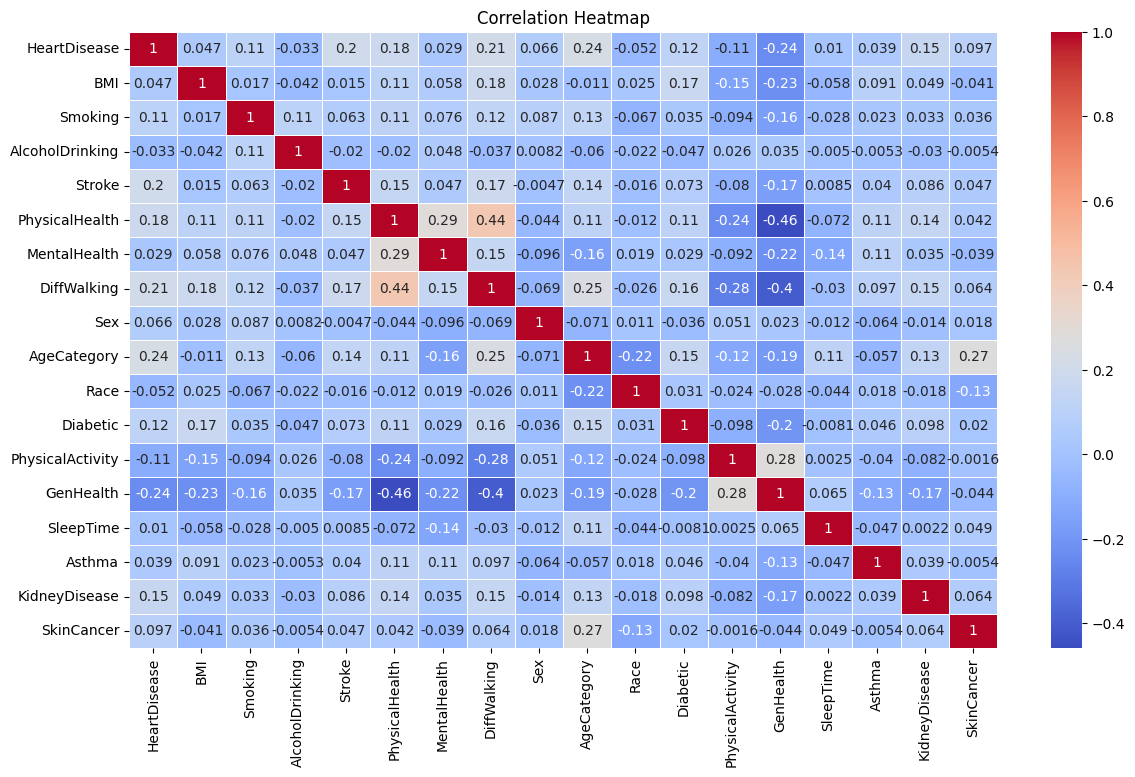

In [19]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
109789             0  20.03        1                0       0             0.0   
109790             0  46.99        0                0       0             5.0   
109791             0  30.23        1                1       0             0.0   
109793             1  23.30        1                0       0             0.0   
109794             0  31.09        1                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          28.186226            0    0            7     1         1   
1           0.000000            0    0           12     1         0   
2          28.186226            0    1            9     1         1   
3           0.000000            0    0           11     1         0   
4           0.000000            1    0            4     1         0   
...              ...          ...  ...          ...   ...       ...   
109789      0.000000            0    0           10     1         0   
109790      0.000000            1    0            6     5         0   
109791      2.000000            0    0           10     1         0   
109793      0.000000            0    1            8     6         0   
109794      5.000000            0    0            9     1         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          4        5.0       1              0   
1                      1          4        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          4        8.0       0              0   
...                  ...        ...        ...     ...            ...   
109789                 1          4        7.0       0              0   
109790                 1          1        7.0       0              0   
109791                 1          2        6.0       0              0   
109793                 1          4        8.0       0              0   
109794                 1          2        7.0       1              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
109789           0  
109790           1  
109791           0  
109793           0  
109794           1  

[107340 rows x 18 columns]

In [21]:
# Min-Max Normalization (Manually)
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory', 'GenHealth', 'Race', 'Diabetic']

for column in numerical_cols:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)



In [22]:
df
df.to_csv('Normalized HeartDisease.csv', index=False)


In [23]:
df

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                  0  0.128574        1                0       0   
1                  0  0.233567        0                0       1   
2                  0  0.408742        1                0       0   
3                  0  0.342209        0                0       0   
4                  0  0.328173        0                0       0   
...              ...       ...      ...              ...     ...   
109789             0  0.224864        1                0       0   
109790             0  0.981711        0                0       0   
109791             0  0.511208        1                1       0   
109793             1  0.316663        1                0       0   
109794             0  0.535351        1                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0             0.107099      1.000000            0    0     0.583333   0.0   
1             0.000000      0.000000            0    0     1.000000   0.0   
2             0.713994      1.000000            0    1     0.750000   0.0   
3             0.000000      0.000000            0    0     0.916667   0.0   
4             0.999592      0.000000            1    0     0.333333   0.0   
...                ...           ...          ...  ...          ...   ...   
109789        0.000000      0.000000            0    0     0.833333   0.0   
109790        0.178499      0.000000            1    0     0.500000   0.8   
109791        0.000000      0.070957            0    0     0.833333   0.0   
109793        0.000000      0.000000            0    1     0.666667   1.0   
109794        0.000000      0.177392            0    0     0.750000   0.0   

        Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0       0.333333                 1        0.8   0.265860       1   
1       0.000000                 1        0.8   0.489286       0   
2       0.333333                 1        0.2   0.600999       1   
3       0.000000                 0        0.4   0.377573       0   
4       0.000000                 1        0.8   0.600999       0   
...          ...               ...        ...        ...     ...   
109789  0.000000                 1        0.8   0.489286       0   
109790  0.000000                 1        0.2   0.489286       0   
109791  0.000000                 1        0.4   0.377573       0   
109793  0.000000                 1        0.8   0.600999       0   
109794  0.000000                 1        0.4   0.489286       1   

        KidneyDisease  SkinCancer  
0                   0           1  
1                   0           0  
2                   0           0  
3                   0           1  
4                   0           0  
...               ...         ...  
109789              0           0  
109790              0           1  
109791              0           0  
109793              0           0  
109794              0           1  

[107340 rows x 18 columns]

In [24]:

from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (85872, 17) (85872,)
Testing data shape: (21468, 17) (21468,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [32]:
def evaluate_model(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    from io import BytesIO
    import base64

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)



    # Returning evaluation metrics
    return {
'Model': model_name,
'Accuracy': accuracy,
'Precision': precision,
'Recall': recall,
'F1 Score': f1,
'Confusion Matrix': cm.tolist(),


    }

# Evaluate models
results = []
results.append(evaluate_model('Logistic Regression', y_test, lr_predictions))
results.append(evaluate_model('Decision Tree', y_test, dt_predictions))
results.append(evaluate_model('Random Forest', y_test, rf_predictions))

# Print results
for result in results:
  for key, value in result.items():
    print(key, ":", value)
  print()

Model : Logistic Regression
Accuracy : 0.9125675423886715
Precision : 0.5555555555555556
Recall : 0.10688216892596454
F1 Score : 0.17927415828596416
Confusion Matrix : [[19386, 164], [1713, 205]]

Model : Decision Tree
Accuracy : 0.8559250978200111
Precision : 0.2316126084970306
Recall : 0.2643378519290928
F1 Score : 0.2468955441928415
Confusion Matrix : [[17868, 1682], [1411, 507]]

Model : Random Forest
Accuracy : 0.9058133035215205
Precision : 0.4011406844106464
Recall : 0.11001042752867571
F1 Score : 0.17266775777414076
Confusion Matrix : [[19235, 315], [1707, 211]]



In [33]:
results_df = pd.DataFrame(results)
print(results_df)
def print_results(results):
    for result in results:
        print("\n" + "="*50)
        print(f"Model: {result['Model']}")
        print("="*50)
        print(f"Accuracy         : {result['Accuracy']:.2f}")
        print(f"Precision        : {result['Precision']:.2f}")
        print(f"Recall           : {result['Recall']:.2f}")
        print(f"F1 Score         : {result['F1 Score']:.2f}")
        print(f"Confusion Matrix :\n{result['Confusion Matrix']}")
        print("="*50)
print_results(results)

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.912568   0.555556  0.106882  0.179274   
1        Decision Tree  0.855925   0.231613  0.264338  0.246896   
2        Random Forest  0.905813   0.401141  0.110010  0.172668   

               Confusion Matrix  
0   [[19386, 164], [1713, 205]]  
1  [[17868, 1682], [1411, 507]]  
2   [[19235, 315], [1707, 211]]  

Model: Logistic Regression
Accuracy         : 0.91
Precision        : 0.56
Recall           : 0.11
F1 Score         : 0.18
Confusion Matrix :
[[19386, 164], [1713, 205]]

Model: Decision Tree
Accuracy         : 0.86
Precision        : 0.23
Recall           : 0.26
F1 Score         : 0.25
Confusion Matrix :
[[17868, 1682], [1411, 507]]

Model: Random Forest
Accuracy         : 0.91
Precision        : 0.40
Recall           : 0.11
F1 Score         : 0.17
Confusion Matrix :
[[19235, 315], [1707, 211]]


In [34]:
q=df[0:109793]
y=q['HeartDisease']
q=q.drop('HeartDisease', axis=1)

In [36]:
lr_predictions = lr_model.predict(q)
print(lr_predictions)
print(y)

[0 0 0 ... 0 0 0]
0         0
1         0
2         0
3         0
4         0
         ..
109789    0
109790    0
109791    0
109793    1
109794    0
Name: HeartDisease, Length: 107340, dtype: int64
